# BST plots

In [9]:
from sst_bst import BSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [110]:
START_TIME="2022-11-26 00:00:00"
END_TIME=  "2022-11-27 00:00:00"

filename="BST_%s.npy"%(START_TIME)
bst=BSTs('bst') #start 11-25 11:58
try:
    D=np.load(filename)
except:
    tstart=datetime.fromisoformat(START_TIME) 
    tend  =datetime.fromisoformat(END_TIME)
    D=bst.getData_percentile(tstart,tend,60*10,percentile=10) #10 min avg
    np.save(filename,D)
finally:
    print(D.shape)

(144, 2, 976)


In [13]:
if False:
    bst=BSTs('bst') #start 11-25 11:58
    tstart=datetime.fromisoformat("2022-11-25 12:00:00") 
    tend  =datetime.fromisoformat("2022-11-26 12:00:00")
    D=bst.getData_percentile(tstart,tend,60*10,percentile=10) #10 min avg
    print(D.shape)

In [111]:
uv_step=0.08
X=np.arange(-1,1,uv_step)
N=len(X)
#print(N,X)
I=np.ones([len(X)])
Y=np.outer(I,X)
X=np.outer(X,I)
R=np.sqrt(X*X+Y*Y)
mask=R<1
theta=np.arccos(R*mask)/np.pi*180
phi=np.angle(X+1j*Y)/np.pi*180
print("Number of beams:",np.sum(mask))
if False:
    plt.subplot(2,2,1)
    plt.imshow(R/mask);plt.colorbar();plt.title('R');
    plt.subplot(2,2,2)
    plt.imshow(theta/mask);plt.colorbar();plt.title('theta');
    plt.subplot(2,2,3)
    plt.imshow(phi/mask,cmap='twilight');plt.colorbar();plt.title('phi');


Number of beams: 484


In [112]:
index=np.array(range(N*N))
indexC=np.compress(mask.flatten(),index)
NC=len(indexC)
thetaC=np.compress(mask.flatten(),theta.flatten())
phiC=np.compress(mask.flatten(),phi.flatten())
def makeMat(N,indexC,varC,zeros=None):
    D=np.zeros([N*N])
    D[:]=zeros
    D[indexC]=varC
    D=D.reshape([N,N])
    return D
#plt.imshow(makeMat(N,indexC,phiC))

In [113]:
PAULUS = False

In [124]:
def P2dB(X): 
    return 10*np.log10(X+1e-3)

steps = 25
y_ax = [1-(2*step/(steps-1)) for step in range(steps)]
x_ax = [-1+(2*step/(steps-1)) for step in range(steps)]

def plot_map(data, bar=True, time_slot=0):
    plt.pcolor(x_ax, y_ax, makeMat(N,indexC,P2dB(data)))
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.title(f"{START_TIME} {(time_slot/6):4.2f} h") 
    if bar:
        plt.colorbar(label='Power dB')

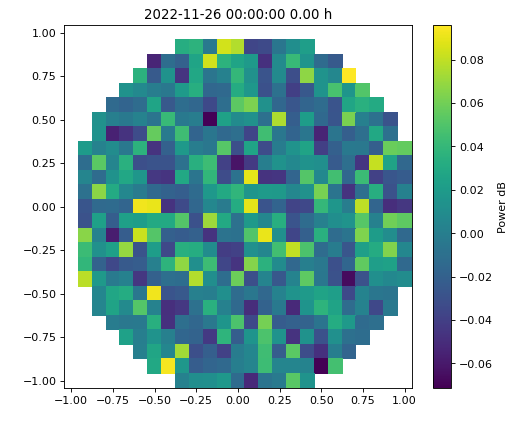

In [125]:
bstX=D[0,0][:2*NC:2]#/D[0,0][2*NC]
bstX/=np.mean(bstX) #/np.mean(D[x,0][2*NC]
bstY=D[0,0][1:1+2*NC:2]#/D[0,0][2*NC+1]
if PAULUS:
    plt.imshow(makeMat(N,indexC,P2dB(bstX)))
    plt.colorbar(label='Power dB')
else:
    plt.figure(figsize=(7,6), dpi=80)
    plot_map(bstX)
plt.show()

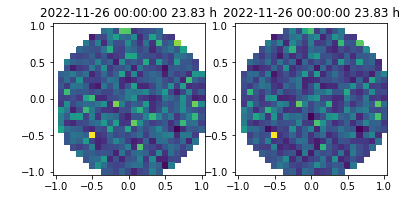

In [126]:
from time import sleep
from IPython.display import clear_output
fig_files = []
for x in range(D.shape[0]):
    clear_output(wait=True)
    bstX=D[x,0][:2*NC:2].copy()
    bstX/=np.percentile(bstX,50)
    bstY=D[x,0][1:1+2*NC:2].copy()#/D[x,0][2*NC+1]    
    bstY/=np.percentile(bstY,50)
    fig1=plt.subplot(1,2,1)
    if PAULUS:
        plt1=plt.imshow(makeMat(N,indexC,P2dB(bstX)),vmin=-0.2,vmax=0.4)
    else:
        plot_map(bstX, bar=False, time_slot=x) 
        fig1.set_aspect('equal')
    fig2=plt.subplot(1,2,2)
    if PAULUS:
        plt2=plt.imshow(makeMat(N,indexC,P2dB(bstY)),vmin=-0.2,vmax=0.4)
    else:
        plot_map(bstY, bar=False, time_slot=x) 
        fig2.set_aspect('equal')
#    plt.colorbar()
    file_name = 'map_' + str(x) + '.png'
    fig_files.append(file_name)
    plt.savefig(file_name)
    plt.show();
    sleep(0.2)

In [127]:
import imageio
with imageio.get_writer('beams_skymap_LBA.gif', mode='I') as writer:
    for filename in fig_files:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_2973958/760917888.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [128]:
!rm map_*.png

Text(0.5, 1.0, 'Beam Stati')

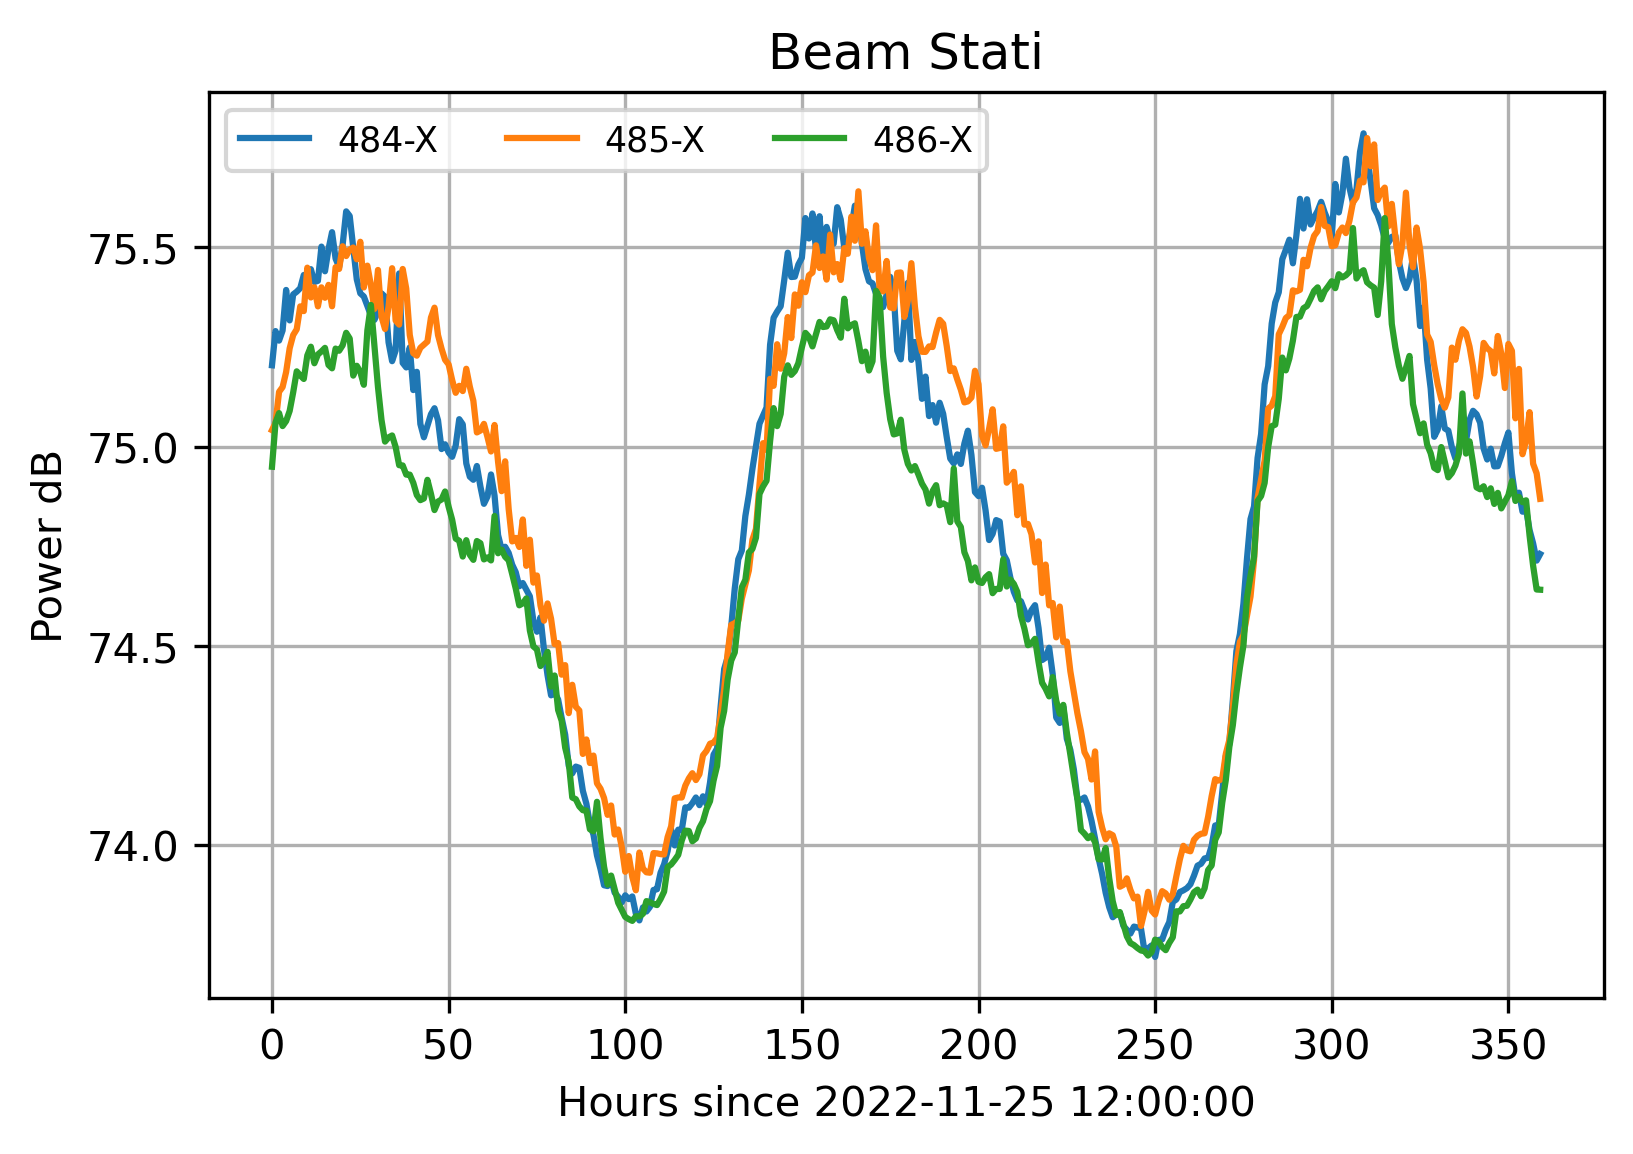

In [29]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484]),label='484-X')
plt.plot(P2dB(D[:,0,2*485]),label='485-X')
plt.plot(P2dB(D[:,0,2*486]),label='486-X')
#for x in range(488):
#    plt.plot(P2dB(D[:,0,2*x]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('Beam Stati')

Text(0.5, 1.0, 'X-pol Beams')

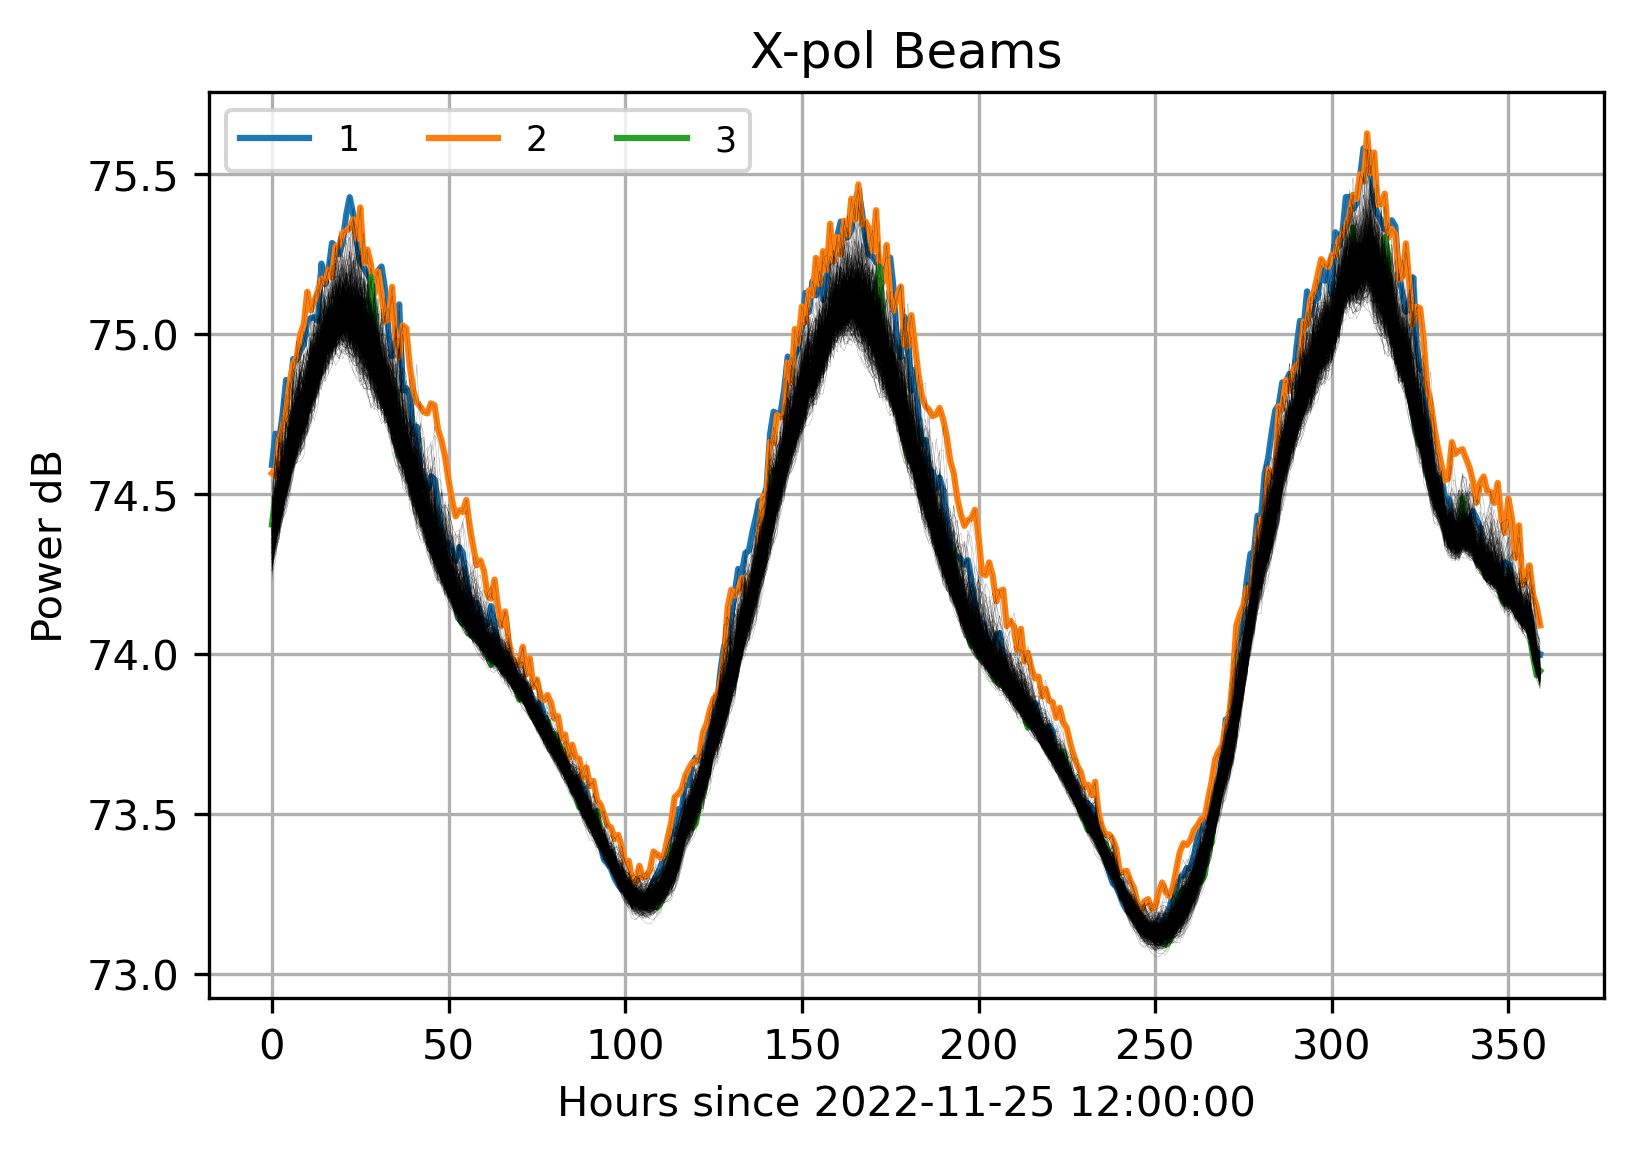

In [30]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484+1]),label='1')
plt.plot(P2dB(D[:,0,2*485+1]),label='2')
plt.plot(P2dB(D[:,0,2*486+1]),label='3')
for x in range(488):
    plt.plot(P2dB(D[:,0,2*x+1]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('X-pol Beams')